<a href="https://colab.research.google.com/github/Shwetacheison/GRIP-Jan2021/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation**

**Data Science and Business Analytics internship**

**Submitted By Shweta Cheison**

**Task2: Prediction Using Unsupervised Learning**



Task: From the given 'Iris' dataset(https://bit.ly/3kXTdox) predict the optimum number of clusters and represent it visually.

**K-Means Algorithm**

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible and ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.


**Data preprocessing**

In [ ]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Importing the dataset
data=pd.read_csv("Iris.csv")
print("Data Imported Successfully")

Data Imported Successfully


In [ ]:
#printing the shape of the dataset
print(data.shape)

(150, 6)


In [ ]:
#checking for null values
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#printing the entries of dataset
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
print("First Ten Entries:")
data.head(10)

First Ten Entries:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
print("Last Ten Entries:")
data.tail(10)

Last Ten Entries:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#finding the number of each species in the dataset
n = len(data[data['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)
n1 = len(data[data['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)
n2 = len(data[data['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


**Plotting piechart**

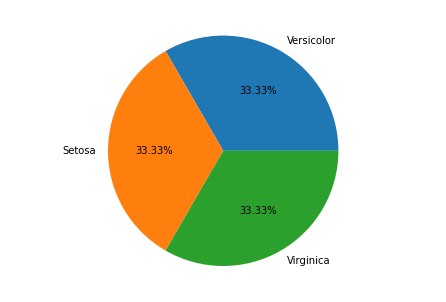

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [ ]:
#correalation
corr_mat = data.corr()
print(corr_mat)

                     Id  SepalLengthCm  ...  PetalLengthCm  PetalWidthCm
Id             1.000000       0.716676  ...       0.882747      0.899759
SepalLengthCm  0.716676       1.000000  ...       0.871754      0.817954
SepalWidthCm  -0.397729      -0.109369  ...      -0.420516     -0.356544
PetalLengthCm  0.882747       0.871754  ...       1.000000      0.962757
PetalWidthCm   0.899759       0.817954  ...       0.962757      1.000000

[5 rows x 5 columns]


In [ ]:
#Extracting Independant variables
x=data.iloc[:,[0,1,2,3]].values

**Finding the optimum number of clusters for k-means classification using Elbow Method**

**Elbow Method:**

The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

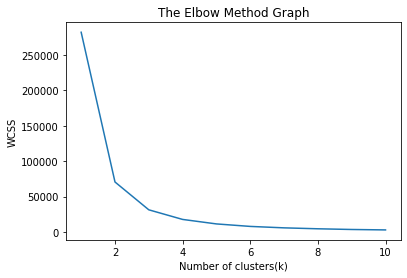

In [ ]:
#finding the optimum number of clusters using elbow method
from sklearn.cluster import KMeans  
wcss= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state= 0)  
    kmeans.fit(x)  
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('WCSS')  
plt.show()  


You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration. Here we can choose the number of clusters as 3.

**Training the model**

In [ ]:
#Training the K-means classifier on the dataset
kmeans = KMeans(n_clusters=3, init='k-means++',
                    max_iter=300, n_init=10, random_state= 0)  
y_predict= kmeans.fit_predict(x)  

**Visualizing the cluster - on the first two columns**

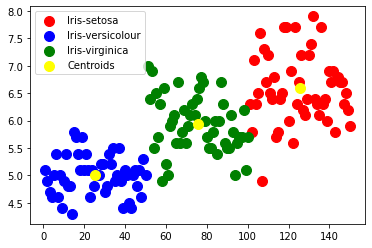

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()